# Project Topic: Understanding factors that affects employee attrition


# Setting the environment by Importing libraries needed

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the dataset

In [44]:
df = pd.read_csv("employeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
new_df = df.drop([ 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours','WorkLifeBalance', 'StockOptionLevel', 'YearsInCurrentRole','DailyRate', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,5993,19479,8,Yes,11,3,1,8,0,6
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,5130,24907,1,No,23,4,4,10,3,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2090,2396,6,Yes,15,3,2,7,3,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,2909,23159,1,Yes,11,3,3,8,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3468,16632,9,No,12,3,4,6,3,2


In [92]:
# Adding new column 'AgeRange'
age_ranges = ["{0} - {1}".format(age, age + 10) for age in range(10, 60, 10)]
age_ranges
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges
new_df['AgeRange'] = pd.cut(x=new_df['Age'], bins=count_unique_age_ranges, labels=age_ranges)
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,AgeRange
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,19479,8,Yes,11,3,1,8,0,6,30 - 40
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,24907,1,No,23,4,4,10,3,10,40 - 50
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2396,6,Yes,15,3,2,7,3,0,30 - 40
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,23159,1,Yes,11,3,3,8,3,8,20 - 30
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,16632,9,No,12,3,4,6,3,2,20 - 30


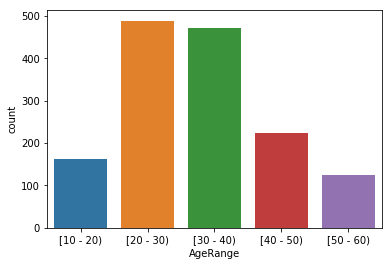

In [54]:
#showing the frequency of age range
sns.countplot(new_df['AgeRange'], label='Count')
plt.show()

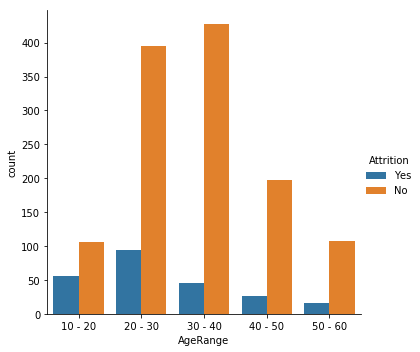

In [96]:

attryes= sns.catplot(x='AgeRange',data=new_df, ci = None, kind= 'count', hue='Attrition')
attryes.fig.suptitle('ager......', y= 1.03)


In [74]:
group_df= new_df.groupby(['AgeRange']).count()
group_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
AgeRange,,,,,,,,,,,,,,,,,,,,,
[10 - 20],162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
[20 - 30],489,489,489,489,489,489,489,489,489,489,...,489,489,489,489,489,489,489,489,489,489
[30 - 40],472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
[40 - 50],223,223,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
[50 - 60],124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124


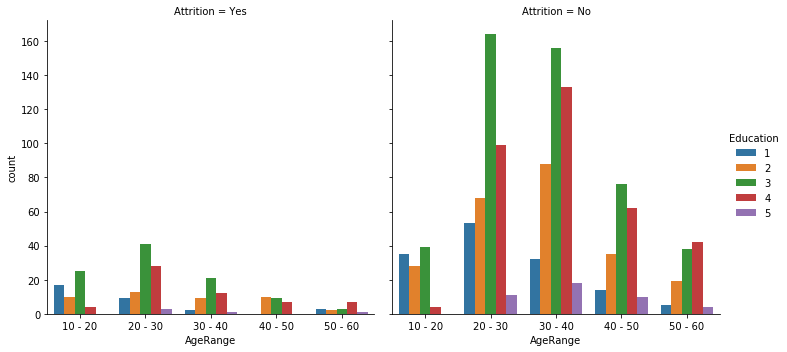

In [104]:

sns.catplot(x='AgeRange',col='Attrition', data= new_df, kind= 'count', hue='Education')
